The purpose of this code is to find if lower resolution skirt runs are very different in terms of the final isrf calculation

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")

In [ ]:
%%time
fdir = "/mnt/raid-cita/dtolgay/FIRE/post_processing_fire_outputs/skirt/runs_hden_radius/firebox/z0.0/gal0"

# Read gas particles
gas_column_names = [
    "x-coordinate",  # pc
    "y-coordinate", 
    "z-coordinate", 
    "smoothing length", # pc 
    "mass",  # Msolar
    "metallicity",  # 
    "temperature", 
    "vx", 
    "vy", 
    "vz", 
    "hden", 
    "radius", 
    "sfr", 
    "turbulence", 
    "density", 
    "mu_theoretical", 
    "average_sobolev_smoothingLength",
    "index", 
    "isrf",
    "L_ly_alpha", # [erg s^-1]
    "L_h_alpha",  # [erg s^-1]
    "L_h_beta",   # [erg s^-1]
    "L_co_10",    # [K km s^-1 pc^2]
    "L_o3_5006",  # [erg s^-1]
]

trial1 = pd.DataFrame(
    np.loadtxt(f"{fdir}/trial1/L_line_average_sobolev_smoothingLength_high_hden_low_hden.txt"),
    columns=gas_column_names
)

level5_10_tau2_frac6 = pd.DataFrame(
    np.loadtxt(f"{fdir}/level5_10_tau2_frac6/L_line_average_sobolev_smoothingLength_high_hden_low_hden.txt"),
    columns=gas_column_names
)

level5_10_tau2_frac6_wavelengthBins250 = pd.DataFrame(
    np.loadtxt(f"{fdir}/level5_10_tau2_frac6_wavelengthBins250/L_line_average_sobolev_smoothingLength_high_hden_low_hden.txt"),
    columns=gas_column_names
)

level5_11_tau2_frac6 = pd.DataFrame(
    np.loadtxt(f"{fdir}/level5_11_tau2_frac6/L_line_average_sobolev_smoothingLength_high_hden_low_hden.txt"),
    columns=gas_column_names
)

voronoi_1e5 = pd.DataFrame(
    np.loadtxt(f"{fdir}/voronoi_1e5/L_line_average_sobolev_smoothingLength_high_hden_low_hden.txt"),
    columns=gas_column_names
)

voronoi_1e6 = pd.DataFrame(
    np.loadtxt(f"{fdir}/voronoi_1e6/L_line_average_sobolev_smoothingLength_high_hden_low_hden.txt"),
    columns=gas_column_names
)

In [ ]:
a = len(trial1) == len(level5_10_tau2_frac6)
b = len(level5_10_tau2_frac6_wavelengthBins250) == len(level5_10_tau2_frac6)

a & b

In [ ]:
bins = np.linspace(start=-5, stop=5, num=1000)

figure, axs = plt.subplots(nrows=3, ncols=2)

axs[0,0].hist(np.log10(trial1["isrf"]), bins = bins, density = True, label="trial1")
# axs[0,0].set_ylim([0,250])
axs[0,0].legend()

axs[0,1].hist(np.log10(level5_10_tau2_frac6["isrf"]), bins = bins, density = True, label="level5_10_tau2_frac6")
# plt.ylim([0,250])
axs[0,1].legend()

axs[1,0].hist(np.log10(level5_10_tau2_frac6_wavelengthBins250["isrf"]), bins = bins, density = True, label="level5_10_tau2_frac6_wavelengthBins250")
# plt.ylim([0,250])
axs[1,0].legend()

axs[1,1].hist(np.log10(level5_11_tau2_frac6["isrf"]), bins = bins, density = True, label="level5_11_tau2_frac6")
# plt.ylim([0,250])
axs[1,1].legend()


axs[2,0].hist(np.log10(voronoi_1e5["isrf"]), bins = bins, density = True, label="voronoi_1e5")
# axs[2,0].set_ylim([0,250])
axs[2,0].legend()

axs[2,1].hist(np.log10(voronoi_1e6["isrf"]), bins = bins, density = True, label="voronoi_1e6")
# axs[2,1].set_ylim([0,250])
axs[2,1].legend()


plt.show()


In [ ]:
indices1 = np.where(np.log10(trial1["isrf"])>0)[0]
indices2 = np.where(np.log10(trial1["isrf"])<0)[0]


bins = np.linspace(start=-5, stop=5, num=1000)

figure, axs = plt.subplots(nrows=2, ncols=2)

axs[0,0].hist(np.log10(trial1.iloc[indices1]["isrf"]), bins = bins, label="isrf > 0")
# axs[0,0].set_ylim([0,250])
axs[0,0].legend()

axs[0,1].hist(np.log10(trial1.iloc[indices1]["L_co_10"]), bins = bins, label="Lco > 0")
# axs[0,0].set_ylim([0,250])
axs[0,1].legend()

axs[1,0].hist(np.log10(trial1.iloc[indices2]["isrf"]), bins = bins, label="isrf < 0")
# axs[0,0].set_ylim([0,250])
axs[1,0].legend()
axs[1,0].set_xlabel("log(isrf)")

axs[1,1].hist(np.log10(trial1.iloc[indices2]["L_co_10"]), bins = bins, label="Lco < 0")
# axs[0,0].set_ylim([0,250])
axs[1,1].legend()
axs[1,1].set_xlabel("log(Lco)")

plt.show()

In [ ]:
bins = np.linspace(start=-5, stop=5, num=1000)

figure, axs = plt.subplots(nrows=3, ncols=2)

axs[0,0].hist(np.log10(trial1["L_co_10"]), bins = bins, density = True, label="trial1")
# axs[0,0].set_ylim([0,250])
axs[0,0].legend()

axs[0,1].hist(np.log10(level5_10_tau2_frac6["L_co_10"]), bins = bins, density = True, label="level5_10_tau2_frac6")
# plt.ylim([0,250])
axs[0,1].legend()

axs[1,0].hist(np.log10(level5_10_tau2_frac6_wavelengthBins250["L_co_10"]), bins = bins, density = True, label="level5_10_tau2_frac6_wavelengthBins250")
# plt.ylim([0,250])
axs[1,0].legend()

axs[1,1].hist(np.log10(level5_11_tau2_frac6["L_co_10"]), bins = bins, density = True, label="level5_11_tau2_frac6")
# plt.ylim([0,250])
axs[1,1].legend()


axs[2,0].hist(np.log10(voronoi_1e5["L_co_10"]), bins = bins, density = True, label="voronoi_1e5")
# axs[2,0].set_ylim([0,250])
axs[2,0].legend()

axs[2,1].hist(np.log10(voronoi_1e6["L_co_10"]), bins = bins, density = True, label="voronoi_1e6")
# axs[2,1].set_ylim([0,250])
axs[2,1].legend()


plt.show()


In [ ]:
bins = np.linspace(0, 2, num = 100)


ratio = abs(np.log10(level5_10_tau2_frac6["isrf"]) / np.log10(trial1["isrf"]))
plt.hist(ratio, bins = bins)
plt.show()

In [ ]:

print("CO")
print(f'''
trial1: {sum(trial1["L_co_10"])/1e9}e9 --- 
level5_10_tau2_frac6: {sum(level5_10_tau2_frac6["L_co_10"])/1e9}e9 --- 
level5_10_tau2_frac6_wavelengthBins250: {sum(level5_10_tau2_frac6_wavelengthBins250["L_co_10"])/1e9}e9 --- 
level5_11_tau2_frac6: {sum(level5_11_tau2_frac6["L_co_10"])/1e9}e9 ---
voronoi_1e5: {sum(voronoi_1e5["L_co_10"])/1e9}e9 ---
voronoi_1e6: {sum(voronoi_1e6["L_co_10"])/1e9}e9 ---
''')


print("\n\n")

print("lya")
print(f'''
trial1: {sum(trial1["L_ly_alpha"])/1e42}e42 --- 
level5_10_tau2_frac6: {sum(level5_10_tau2_frac6["L_ly_alpha"])/1e42}e42 --- 
level5_10_tau2_frac6_wavelengthBins250: {sum(level5_10_tau2_frac6_wavelengthBins250["L_ly_alpha"])/1e42}e42 --- 
level5_11_tau2_frac6: {sum(level5_11_tau2_frac6["L_ly_alpha"])/1e42}e42 ---
voronoi_1e5: {sum(voronoi_1e5["L_ly_alpha"])/1e42}e42 ---
voronoi_1e6: {sum(voronoi_1e6["L_ly_alpha"])/1e42}e42 ---
''')

print("\n\n")

print("ha")
print(f'''
trial1: {sum(trial1["L_h_alpha"])/1e41}e41 --- 
level5_10_tau2_frac6: {sum(level5_10_tau2_frac6["L_h_alpha"])/1e41}e41 --- 
level5_10_tau2_frac6_wavelengthBins250: {sum(level5_10_tau2_frac6_wavelengthBins250["L_h_alpha"])/1e41}e41 --- 
level5_11_tau2_frac6: {sum(level5_11_tau2_frac6["L_h_alpha"])/1e41}e41 ---
voronoi_1e5: {sum(voronoi_1e5["L_h_alpha"])/1e41}e41 ---
voronoi_1e6: {sum(voronoi_1e6["L_h_alpha"])/1e41}e41 ---
''')



# RBF Interpolator

In [1]:
import sys 
sys.path.append('/mnt/raid-cita/dtolgay/FIRE/post_processing_fire_outputs/')

from tools import functions_readfiles as readfiles
from tools import functions_importing_observations as observations

import numpy as np 
import pandas as pd


import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")

In [2]:
%%time

# Observations 
XCOLDGASS_df, PHIBBS2_df, ALMA_df, Leroy_df = observations.read_CO_observations()


# FIRE Data
galaxy_name = "m12i_res7100_md"
galaxy_type = "zoom_in"
redshift = "0.0"

base_fdir = f"/mnt/raid-cita/dtolgay/FIRE/post_processing_fire_outputs/skirt/runs_hden_radius/{galaxy_type}/z{redshift}/{galaxy_name}"

runs = {
    "voronoi_3e6": {
        "dir_name": "voronoi_3e6",
        "color": "tab:gray",
        "label": "voronoi_3e6",
        "data": pd.DataFrame(),        
    },      
    "voronoi_1e6": {
        "dir_name": "voronoi_1e6",
        "color": "Tab:Orange",
        "label": "voronoi_1e6",
        "data": pd.DataFrame(),
    },
    "voronoi_3e5": {
        "dir_name": "voronoi_3e5",
        "color": "tab:brown",
        "label": "voronoi_3e5",
        "data": pd.DataFrame(),        
    },      
    "voronoi_1e5": {
        "dir_name": "voronoi_1e5",
        "color": "Tab:Red",
        "label": "voronoi_1e5",
        "data": pd.DataFrame(),
    },   
    "voronoi_1e4": {
        "dir_name": "voronoi_1e4",
        "color": "violet",
        "label": "voronoi_1e4",
        "data": pd.DataFrame(),        
    },     
}



for run in runs.keys():
    
    # Read line emissions 
    lines, lines_columns = readfiles.read_interpolated_files_usingFilePath(
        path = f"{base_fdir}/{runs[run]['dir_name']}/line_emissions_RBFInterpolator_smoothingLength.txt", 
        interpolation_type = "line_emissions",
    )
    
    # Read abundance 
    abundance, abundance_columns = readfiles.read_interpolated_files_usingFilePath(
        path = f"{base_fdir}/{runs[run]['dir_name']}/abundance_RBFInterpolator_smoothingLength.txt", 
        interpolation_type = "abundance",
    )    
    
    # Read temperatures 
    temperature, temperature_columns = readfiles.read_interpolated_files_usingFilePath(
        path = f"{base_fdir}/{runs[run]['dir_name']}/temperature_RBFInterpolator_smoothingLength.txt", 
        interpolation_type = "temperature",
    )    
    
    # Merge the dataframes 
    data = lines.merge(abundance[abundance_columns + ['index']], how='inner', on='index')
    data = data.merge(temperature[temperature_columns + ['index']], how='inner', on='index')
    
    
    
    runs[run]["data"] = data

I am in the function XCold_Gass_data_reading
I am in the function PHIBSS2_data_reading
I am in the function ALMA_2019_Data_Reading
I am in the function Leroy_data_reading
average_radius_r25_times_075_LEROY:  8.886206896551723
CPU times: user 7min 8s, sys: 35.4 s, total: 7min 43s
Wall time: 7min 52s


In [3]:
for key, value in runs.items():
    print(f"{value['label']} -- Lco10: {sum(value['data']['L_co_10']):.2e}")

print("\n")

for key, value in runs.items():
    print(f"{value['label']} -- Lha: {sum(value['data']['L_h_alpha']):.2e}")


voronoi_3e6 -- Lco10: 8.41e+08
voronoi_1e6 -- Lco10: 8.26e+08
voronoi_3e5 -- Lco10: 8.03e+08
voronoi_1e5 -- Lco10: 7.74e+08
voronoi_1e4 -- Lco10: 7.14e+08


voronoi_3e6 -- Lha: 3.06e+41
voronoi_1e6 -- Lha: 3.07e+41
voronoi_3e5 -- Lha: 3.11e+41
voronoi_1e5 -- Lha: 3.24e+41
voronoi_1e4 -- Lha: 4.16e+41


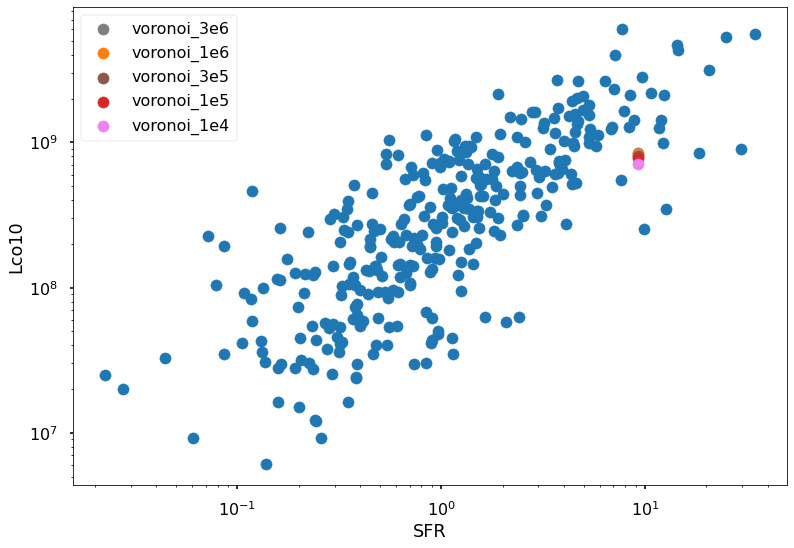

In [4]:
detections = XCOLDGASS_df['FLAG_CO'] == 1
plt.scatter(
    XCOLDGASS_df.loc[detections, 'SFR'],
    XCOLDGASS_df.loc[detections, 'Lco'],
)

for key, value in runs.items():
    plt.scatter(
        sum(value['data']['sfr']),
        sum(value['data']['L_co_10']),
        label = value['label'],
        color = value['color'],
    )

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel('SFR')
plt.ylabel('Lco10')
plt.show()

In [ ]:
for key, value in runs.items():
    plt.scatter(value['data']['isrf'], value['data']['L_co_10'], label=value['label'])

plt.xlabel('isrf')
plt.ylabel('Lco10')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
x = np.linspace(start=min(runs['voronoi_1e6']['data']['isrf']), stop=max(runs['voronoi_1e6']['data']['isrf']), num=100)
y = x
plt.plot(x,y,c="red")
plt.scatter(
    runs['voronoi_1e5']['data']['isrf'],
    runs['voronoi_1e6']['data']['isrf'],
)
plt.xlabel('voronoi_1e5')
plt.ylabel('voronoi_1e6')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [7]:
for key, value in runs.items():
    print(f"{value['label']} -- median: {np.median(value['data']['isrf'])}")
    
print("\n\n")

for key, value in runs.items():
    print(f"{value['label']} -- mean: {np.mean(value['data']['isrf'])}")    

voronoi_3e6 -- median: 0.11297931
voronoi_1e6 -- median: 0.14381539
voronoi_3e5 -- median: 0.16606447
voronoi_1e5 -- median: 0.18828937
voronoi_1e4 -- median: 0.32427644



voronoi_3e6 -- mean: 0.7708889616731835
voronoi_1e6 -- mean: 0.8270295357376377
voronoi_3e5 -- mean: 0.8913275858313006
voronoi_1e5 -- mean: 0.9576141249658252
voronoi_1e4 -- mean: 1.1546727006604849


In [8]:
np.mean(runs['voronoi_1e6']['data']['isrf'])

0.8270295357376377

In [10]:
runs[run]['data'].columns

Index(['x', 'y', 'z', 'smoothing_length', 'mass', 'metallicity', 'temperature',
       'vx', 'vy', 'vz', 'hden', 'radius', 'sfr', 'turbulence', 'density',
       'mu_theoretical', 'average_sobolev_smoothingLength', 'index', 'isrf',
       'L_ly_alpha', 'L_h_alpha', 'L_h_beta', 'L_co_10', 'L_co_21', 'L_co_32',
       'L_co_43', 'L_co_54', 'L_co_65', 'L_co_76', 'L_co_87', 'L_13co', 'L_c2',
       'L_o3_88', 'L_o3_5006', 'L_o3_4958', 'fh2', 'fCO', 'Th2', 'Tco', 'T'],
      dtype='object')

In [11]:
for run in runs.keys():
    result = sum(runs[run]['data']['isrf'] * runs[run]['data']['radius']**3)/sum(runs[run]['data']['radius']**3)
    print(f"{run}: {result}")

voronoi_3e6: 0.18547441373203774
voronoi_1e6: 0.1758577262660613
voronoi_3e5: 0.1660799246889103
voronoi_1e5: 0.15974674197011057
voronoi_1e4: 0.1936779815708285


# Cloudy Runs

In [ ]:
# FIRE Data
galaxy_name = "m12i_res7100_md"
galaxy_type = "zoom_in"
redshift = "0.0"

base_fdir = f"/mnt/raid-cita/dtolgay/FIRE/post_processing_fire_outputs/skirt/runs_hden_radius/{galaxy_type}/z{redshift}/{galaxy_name}"

runs = {
    "voronoi_1e5": {
        "dir_name": "voronoi_1e5",
        "color": "Tab:Red",
        "label": "voronoi_1e5",
        "data": pd.DataFrame(),
    },   
    "40kpc_voronoi_1e5": {
        "dir_name": "40kpc_voronoi_1e5",
        "color": "violet",
        "label": "40kpc_voronoi_1e5",
        "data": pd.DataFrame(),        
    },     
}

for run in runs.keys():
    runs[run]['data'] = readfiles.read_cloudy_gas_particles(
        galaxy_name, 
        galaxy_type, 
        redshift, 
        directory_name = runs[run]["dir_name"],
        base_fdir = f"/mnt/raid-cita/dtolgay/FIRE/post_processing_fire_outputs/skirt/runs_hden_radius"        
    )


In [ ]:
# runs["40kpc_voronoi_1e5"]['data']['isrf']

criteria

In [ ]:
bins = np.linspace(-5, 2, num=100)
counter = 0
alpha = 1

plt.hist(np.log10(runs["voronoi_1e5"]['data']['isrf']), bins=bins, label="voronoi_1e5", alpha=1)


criteria = np.sqrt(runs["40kpc_voronoi_1e5"]['data']['x']**2 + runs["40kpc_voronoi_1e5"]['data']['y']**2 + runs["40kpc_voronoi_1e5"]['data']['z']**2) < 20e3
plt.hist(np.log10(runs["40kpc_voronoi_1e5"]['data'][criteria]['isrf']), bins=bins, label="40kpc_voronoi_1e5", alpha=0.5)


    
plt.legend()
plt.show()